                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt    

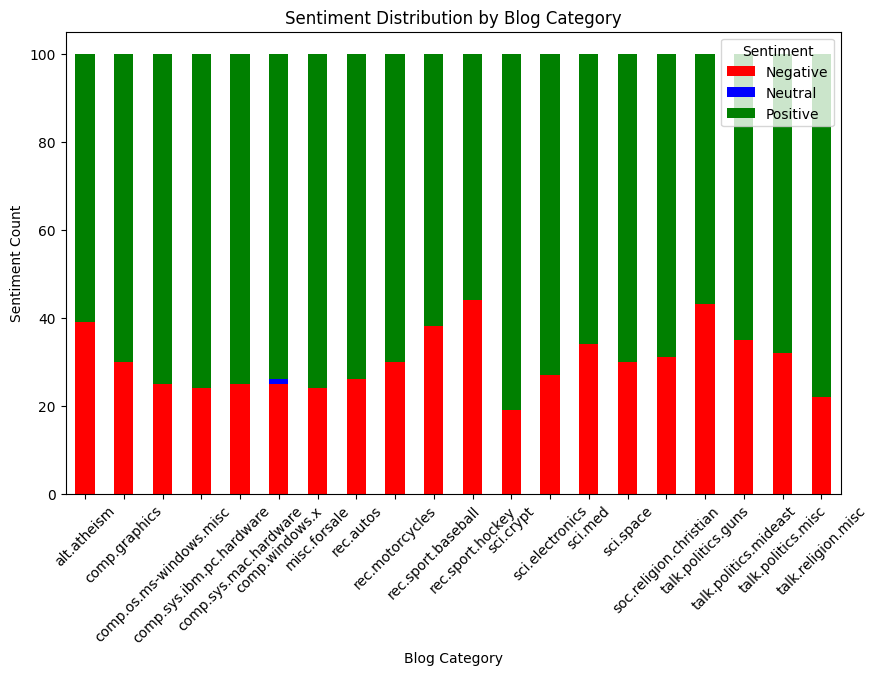

In [10]:
import pandas as pd
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/blogs.csv')

print(df.head())
print(df.info())
print(df['Labels'].value_counts())

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

df['Cleaned_Text'] = df['Data'].apply(preprocess_text)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Text'])
y = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)
print(df[['Cleaned_Text', 'Sentiment']].head())

sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print(sentiment_distribution)

sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution by Blog Category')
plt.xlabel('Blog Category')
plt.ylabel('Sentiment Count')
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()
